<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ام نیست
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    با پیشرفت در طراحی سیستم‌های سخت‌افزاری، امکان اجرای الگوریتم‌های پیشرفته و سنگین‌تر فراهم شد. در نتیجه این اتفاق، رخدادهای فراوانی به وقوع پیوست که یکی از آن‌ها تحول در پردازش تصویر رقمی بود.
    <br>
    منظور از پردازش تصویر رقمی، آنالیز و کشف الگو در دل تصاویر دیجیتال است. کاربردهای پردازش تصویر را در <i>face recognition</i> تلفن‌های همراه هوشمند می‌توان مشاهده کرد. این سیستم‌ها با دریافت تصویر به عنوان ورودی، تشخیص می‌دهد که آیا شخص مجاز به ورود به تلفن همراه هست یا خیر. البته عملکرد این سیستم فراتر از یک تشخیص ساده است. زیرا ممکن است شخصی با گرفتن عکس شما جلو دوربین تلفن همراه، قصد ورود غیرمجاز به حریم شخصی شما را داشته باش!
    <br>
    از بحث تشخیص چهره بگذریم، یکی از ساده‌ترین مثال‌هایی که در پردازش تصویر مطرح است، تشخیص ارقام دست‌نویس است. به این معنی که با دریافت عکس از یک عدد دست‌نویس، کامپیوتر بتواند تشخیص دهد چه عددی ورودی گرفته است.
    <br>
    مثلا با مشاهده این عکس 
    <br>
    <img src="./four.png", alt="picture of four"/>
    عدد چهار را خروجی دهد.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیازتان را وارد کنید.
</font>
</p>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
داده آموزشی مسئله دارای ۶۰۰۰۰ سطر و ۷۸۵ ستون است.
    <br>
   هر سطر اطلاعات یک عکس را نشان می‌دهد. اولین ستون نشان‌دهنده برچسب نمونه (عددی داخل عکس) و ۷۸۴ ستونی که در ادامه آمده‌اند، ویژگی‌های یک عکس هستند.
    <br>
       عکس را می‌توان یک ماتریس در نظر گرفت که هر درایه آن یک پیکسل است. عدد موجود در هر درایه بین ۰ و ۲۵۵ است و هر چه به ۲۵۵ نزدیک شود، درجه روشنایی آن پیکسل بیشتر خواهد بود. بنابراین پیکسلی با عدد ۲۵۵ کامل سفید و پیکسلی با عدد ۰ کامل سیاه نمایش داده خواهد شد. مثلا در عکس بالا، پیکسل‌هایی که درون عدد ۴ هستند، عدد بزرگتری نسبت به حاشیه تصویر که سیاه رنگ است، دارند.
    <br>
    دیتاست این تمرین نیز در حقیقت شامل ۶۰ هزار ماتریس ۲۸*۲۸ است. برای راحتی شما هر کدام از ماتریس‌های ۲۸*۲۸ را هموار کرده‌ایم. به این معنی که سطرهای ماتریس را در امتداد همدیگر چیده و یک آرایه ۷۸۴تایی درست کرده‌ایم.
    <br>
    برای همین است که هر سطر دیتافریم (هر عکس) دارای ۷۸۴ ستون یا ویژگی است و یک برچسب هم دارد.
    <br>
    نامگذاری ستون‌های دیتافریم به صورت $i*j$ است. یعنی عددی که در این ستون مشاهده می‌کنید در ماتریس اصلی (قبل از هموار شدن) در سطر $i$ ام و ستون $j$ ام قرار داشته.
    <br>
    ستون دیگری به اسم <code>label</code> فقط در دیتافریم آموزش یافت می‌شود که نشانگر عدد درون تصویر است.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از دادگان آموزشی را به عنوان دادگان اعتبارسنجی نیز جدا کنید.
</font>
</p>

In [36]:
train_data = pd.read_csv('mnist_train.csv')
train_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
test_data = pd.read_csv('mnist_test.csv')
test_data

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی که در فصل‌های گذشته آموختید، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    تلاش کنید با <code>reshape</code> کردن یک سطر از دیتافریم، و با استفاده از مت‌پلات‌لیب عدد درون آن را مشاهده کنید.
    <br>
    متد <code>matshow</code> در مت‌پلات‌لیب برای به تصویر کشیدن ماتریس‌ها استفاده می‌شود.
</font>
</p>

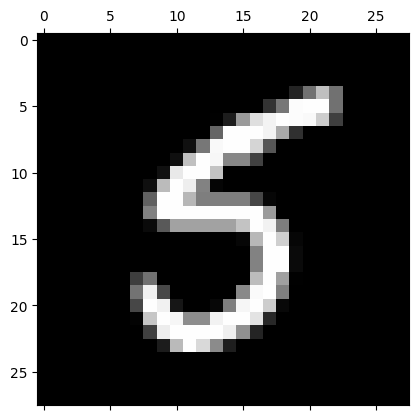

In [38]:
# plot a picture based on some row in `train_data`
p5=train_data.iloc[2,1:].values
p5_28=p4.reshape(28,-1)
plt.matshow(p5_28,cmap='gray')
plt.show()

In [39]:
NAN_number=train_data.isna().sum()
NAN_number_total=NAN_number.sum()
Duplicated_number=train_data.duplicated().sum()
print(NAN_number,'Duplicated_number = ',Duplicated_number,'NAN_number_total=',NAN_number_total)


label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64 Duplicated_number =  0 NAN_number_total= 0


In [40]:
NAN_number=test_data.isna().sum()
NAN_number_total=NAN_number.sum()
Duplicated_number=test_data.duplicated().sum()
print(NAN_number,'Duplicated_number = ',Duplicated_number,'NAN_number_total=',NAN_number_total)

1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 784, dtype: int64 Duplicated_number =  0 NAN_number_total= 0


In [41]:
train_data['label'].value_counts()

label
1    6752
7    6251
3    6121
2    5991
9    5964
0    5917
6    5894
8    5850
4    5849
5    5411
Name: count, dtype: int64

In [42]:
train_data.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0
mean,4.452417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.182017,0.106950,0.053883,0.018067,0.010883,0.001033,0.0,0.0,0.0,0.0
std,2.890209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.803968,4.395759,3.005273,1.655844,1.319644,0.253114,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,244.000000,62.000000,0.0,0.0,0.0,0.0


In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_data.iloc[:,1:]=scaler.fit_transform(train_data.iloc[:,1:])
test_data.iloc[:,:]=scaler.transform(test_data.iloc[:,:])
train_data

C:\Users\USER\AppData\Local\Temp\ipykernel_8504\1320195888.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.iloc[:,1:]=scaler.fit_transform(train_data.iloc[:,1:])
C:\Users\USER\AppData\Local\Temp\ipykernel_8504\1320195888.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.iloc[:,1:]=scaler.fit_transform(train_data.iloc[:,1:])
C:\Users\USER\AppData\Local\Temp\ipykernel_8504\1320195888.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with int64, please explicitly cast to a com

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
59998,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    حال که داده را پاکسازی کرده و احتمالا ویژگی‌هایی را به آن افزوده یا از آن حذف کرده‌اید، وقت آن است که مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.
</font>
</p>

<h3 align=right style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    استفاده از <code>scikit-learn</code>
</font>
</h3>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    الگوریتم <i>پرسپترون چند لایه</i> با نام <code>MLPClassifier</code> در پکیج <code>neural_network</code> این کتابخانه در دسترس است. برخی از آرگومان‌های مهم آن در جدول زیر آمده است، اما جهت مطالعه‌ی کامل‌تر مستندات می‌توانید به <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html" target="_blank">این لینک</a> مراجعه فرمایید.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|آرگومان|جنس و تایپ|توضیحات|
|:------:|:--------:|:---:|
|hidden_layer_sizes|<code>tuple</code>|تعداد نورون‌های لایه‌های مخفی شبکه عصبی را نشان می‌دهد. <code>len</code> این آرگومان برابر است با $n_{layers} -2 $. المان $i$ ام این تاپل، تعداد نورون‌های لایه $i$ ام شبکه را نشان می‌دهد. به عنوان مثال $hidde\_layer\_sizes = (100,128)$ به معنی این است که در اولین لایه مخفی ۱۰۰ نورون و در دومین لایه مخفی ۱۲۸ نورون وجود داشته باشد. به صورت پیشفرض این آرگومان برابر است با $hidden\_layer\_sizes = (100, )$ |
|activation|<code>str</code>|تابع فعالسازی را با این آرگومان مشخص می‌کنیم. این آرگومان یکی از مقادیر *identity* , *relu*, *tanh*, *logistic* را می‌تواند بپذیرد. |
|solver|<code>str</code>|تابع بهینه‌ساز را مشخص می‌کند. این آرگومان به صورت پیشفرض بر روی *adam* تنظیم شده است، اما مقادیر دیگری نظیر *lbfgs* و *sgd* را نیز می‌پذیرد. بهینه‌ساز پیشفرض برای دیتاست‌هایی با هزاران یا بیشتر تعداد نمونه مناسب است؛ هم از لحاظ زمان آموزش و هم لحاظ معیار کیفی، نتایج قابل قبولی ارائه می‌کند. اما برای داده‌های کوچک‌تر می‌توانید از *lbfgs* استفاده کنید.|
|alpha|`float`|ضریب منظم‌سازی *L2* است که به تابع هزینه اضافه می‌شود.|
|tol|`float`|آستانه تحمل بهینه‌سازی را نشان می‌دهد. وقتی امتیاز یا هزینه مدل، در `n_iter_no_change` بار چرخش، به اندازه حداقل `tol` بهبود نمی‌یابد، مدل فرض می‌کند که تابع بهینه‌سازی، به نقطه اپتیمم همگرا شده است و الگوریتم را متوقف می‌کند.|
|max_iter|<code>int</code>|حداکثر دفعاتی که الگوریتم بهینه‌ساز مجاز است اجرا شود تا به نقطه بهینه همگرا شود. شرط پایان الگوریتم یا رسیدن به `max_iter` است یا اینکه با گذشت `n_iter_no_change` بار چرخش، امتیاز مدل دست کم `tol` هم بهبود پیدا نکند.|
|n_iter_no_change|<code>int</code>|حداکثر تعداد *epoch* ای که الگوریتم مجاز است اجرا شود تا به نقطه بهینه همگرا شود را نشان می‌دهد.|
|early_stopping|<code>bool</code>|مشخص می‌کند که آیا الگوریتم در صورتی که پس از `n_iter_no_change` بار چرخش، باز هم به نقطه بهینه همگرا نشده است، مجاز است متوقف شود یا خیر.|
    
</font>
</div>
</center>


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آموزش مدل
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در سلول زیر با استفاده از مدل آماده‌ای که در بالا شرح داده شد و به کمک تابع <code>fit</code> الگوریتم را بر روی دادگان آموزشی اجرا کنید.
</font>
</p>

In [47]:
# modeling
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X=train_data.drop(['label'],axis=1)
Y=train_data['label']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


model = MLPClassifier(hidden_layer_sizes=(128,100),activation='relu',solver='adam',alpha=0.0001,learning_rate='constant',max_iter=200,
                      random_state=42)

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

In [48]:
#checking  the model for overfitting
train_accuracy=model.score(x_train,y_train)
test_accuracy=model.score(x_test,y_test)
if train_accuracy-train_accuracy > 0.1:
    print('Model is overfitting!')
else:
    print('Model is generalization well!')

Model is generalization well!


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>f1_score</code> نام دارد.
    <br>
    این معیار، سنجه ارزیابی کیفیت مدل شماست. به عبارت بهتر در سامانه داوری هم از همین معیار برای نمره‌دهی استفاده شده است.
    <br>
    پیشنهاد می‌شود با توجه به این معیار، عملکرد مدل خود را بر روی دادگان آموزش یا اعتبارسنجی ارزیابی کنید.
</font>
</p>

In [49]:
# evaluateing the model
from sklearn.metrics import f1_score, classification_report, confusion_matrix,recall_score


f1=f1_score(y_test,y_pred,average='weighted')
classification_report=classification_report(y_test,y_pred)
print('F1_Score (weighted) =' , f1)

print(classification_report)

cm=confusion_matrix(y_test,y_pred)

print('Confision_Matrix')
print(cm)

recall=recall_score(y_test,y_pred,average='weighted')
print('Recall_Score (Weighted) =' ,recall)


F1_Score (weighted) = 0.975917091550064
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1177
           1       0.99      0.99      0.99      1370
           2       0.97      0.97      0.97      1189
           3       0.98      0.97      0.98      1228
           4       0.97      0.97      0.97      1165
           5       0.98      0.97      0.97      1091
           6       0.98      0.98      0.98      1175
           7       0.97      0.98      0.98      1254
           8       0.97      0.97      0.97      1183
           9       0.97      0.97      0.97      1168

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000

Confision_Matrix
[[1154    0    3    0    3    2    7    0    4    4]
 [   0 1350    4    2    3    1    2    4    4    0]
 [   1    3 1158    8    4    0    0   10    3    2]
 [   0    1    6 1194    

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
 جهت کسب امتیاز کامل نیاز است تا پاسخ شما حداقل امتیاز <code>95%</code> را با توجه به معیار معرفی‌شده کسب نماید.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    پس از مهندسی ویژگی و مدلسازی، الگوریتمی دارید که می‌تواند شما را از متغیرهای وابسته به متغیر هدف برساند.
    <br>
    از این مدل برای پیش‌بینی نمونه‌های موجود در داده تست استفاده کنید و نتایج را در قالب جدول (<code>dataframe</code>) زیر آماده کنید.
</font>
</p>

<div dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|------|---|
|label|عدد درون تصویر|
    
</font>
</div>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    اسم دیتافریم باید <i>submission</i> باشد؛ در غیر این صورت، سامانه داوری نمی‌تواند تلاش‌ شما را ارزیابی کند.
    <br>
    این دیتافریم تنها شامل ۱ ستون با اسم <i>label</i> است و ۱۰۰۰۰ سطر دارد.
    <br>
    به ازای هر سطر موجود در دیتافریم <i>test_data</i> شما باید یک مقدار پیشبینی شده داشته باشید.
    <br>
    جدول زیر، ۵ سطر ابتدایی دیتافریم <code>submission</code> را نشان می‌دهد. البته در جواب شما، اعداد ستون <i>label</i> ممکن است متفاوت باشد.
</font>
</p>

<div style="text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
||label|
|----|-----|
|0|1|
|1|6|
|2|9|
|3|4|
|4|0|

</font>
</div>



In [50]:
# predict test samples
prediction_t =model.predict(test_data)
submission = pd.DataFrame({'label':prediction_t})
submission

,label
0,9
1,5
2,0
3,8
4,8
...,...
9995,5
9996,1
9997,6
9998,6


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [ ]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

joblib.dump(model, 'model')
submission.to_csv('submission.csv', index=False)
file_names = ['mnist.ipynb', 'submission.csv', 'model']
compress(file_names)